<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Pre-Processing-for-modeling" data-toc-modified-id="Pre-Processing-for-modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pre-Processing for modeling</a></span></li><li><span><a href="#Machine-Learning-Modeling" data-toc-modified-id="Machine-Learning-Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning Modeling</a></span><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multiple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Workflow-from:-live-learning-sessions/machine-learning-and-customer-analytics/Retail-Sale-Modeling-with-Multiple-Linear-Regression.ipynb" data-toc-modified-id="Workflow-from:-live-learning-sessions/machine-learning-and-customer-analytics/Retail-Sale-Modeling-with-Multiple-Linear-Regression.ipynb-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Workflow from: live-learning-sessions/machine-learning-and-customer-analytics/Retail Sale Modeling with Multiple Linear Regression.ipynb</a></span></li><li><span><a href="#FEATURE-SELECTION" data-toc-modified-id="FEATURE-SELECTION-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>FEATURE SELECTION</a></span></li><li><span><a href="#Conclusion:-MLR-Model-is-worse-using-reduced-dataset" data-toc-modified-id="Conclusion:-MLR-Model-is-worse-using-reduced-dataset-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Conclusion: MLR Model is worse using reduced dataset</a></span></li></ul></li></ul></li></ul></div>

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#import PreProcessing as preprocess

# Pre-Processing for modeling

In [13]:
train_undum_df = pd.read_csv('./Data/train_undum_df.csv')
test_undum_df = pd.read_csv('./Data/test_undum_df.csv')
train_dum_df = pd.read_csv('./Data/train_dum_df.csv')
test_dum_df = pd.read_csv('./Data/test_dum_df.csv')

train_dum_df = train_dum_df.drop("Unnamed: 0", axis = 1) # drop stupid duplicated index column

In [15]:
#assign predictor and target variables
y = train_dum_df['SalePrice'].apply(np.log)
X = train_dum_df.drop("SalePrice", axis = 1)

In [16]:
#train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Machine Learning Modeling
##   Multiple Linear Regression 
### Workflow from: live-learning-sessions/machine-learning-and-customer-analytics/Retail Sale Modeling with Multiple Linear Regression.ipynb

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)
# 0.907867730051274

0.907867730051274

In [18]:
lm2 = LinearRegression()
lm2.fit(X_test, y_test)
lm2.score(X_test, y_test)
# 0.9684120913296064  # model is underfit

0.9684120913296064

In [21]:
print('The intercept is ', lm.intercept_)
pd.Series(lm.coef_, index=X_test.columns)

The intercept is  9.865021857422688


MSSubClass_30           -0.111821
MSSubClass_40            0.044645
MSSubClass_45           -0.099473
MSSubClass_50            0.059075
MSSubClass_60           -0.022215
MSSubClass_70            0.044345
MSSubClass_75            0.028310
MSSubClass_80           -0.003059
MSSubClass_85            0.047538
MSSubClass_90           -0.034292
MSSubClass_120          -0.045739
MSSubClass_160          -0.119682
MSSubClass_180          -0.019619
MSSubClass_190          -0.049707
MSZoning_FV              0.318826
MSZoning_RH              0.339884
MSZoning_RL              0.281601
MSZoning_RM              0.265720
LotShape_IR2             0.047624
LotShape_IR3            -0.064417
LotShape_Reg             0.001872
LandContour_HLS          0.113972
LandContour_Low          0.068938
LandContour_Lvl          0.069036
LotConfig_CulDSac        0.025933
LotConfig_FR2           -0.051608
LotConfig_FR3           -0.125008
LotConfig_Inside        -0.017370
Neighborhood_Blueste    -0.044396
Neighborhood_B

In [22]:
print('The intercept is ', lm2.intercept_)
pd.Series(lm2.coef_, index=X_test.columns)

The intercept is  9.575708349059656


MSSubClass_30           -1.379107e-01
MSSubClass_40           -4.500080e-01
MSSubClass_45            6.034676e-02
MSSubClass_50            1.413411e-01
MSSubClass_60           -1.815756e-02
MSSubClass_70           -2.336015e-02
MSSubClass_75           -6.351645e-03
MSSubClass_80            1.498222e-01
MSSubClass_85           -2.837507e-02
MSSubClass_90           -1.514588e-02
MSSubClass_120           2.522955e-01
MSSubClass_160           1.924163e-01
MSSubClass_180           2.433687e-01
MSSubClass_190          -1.217790e-01
MSZoning_FV              6.848365e-01
MSZoning_RH              6.011767e-01
MSZoning_RL              6.324506e-01
MSZoning_RM              5.672828e-01
LotShape_IR2             9.957563e-03
LotShape_IR3            -3.838330e-02
LotShape_Reg             2.107491e-02
LandContour_HLS         -1.069950e-01
LandContour_Low         -3.486477e-02
LandContour_Lvl         -5.595525e-02
LotConfig_CulDSac       -2.403880e-02
LotConfig_FR2           -6.833399e-02
LotConfig_FR

In [29]:
lm3 = LinearRegression()
lm3.fit(X, y)
lm3.score(X, y)
# 0.9111276506846576

0.9111276506846576

In [30]:
print('The intercept is ', lm3.intercept_)
pd.Series(lm3.coef_, index=X_test.columns)


The intercept is  9.55655193513601


MSSubClass_30           -0.096302
MSSubClass_40           -0.055891
MSSubClass_45           -0.114744
MSSubClass_50            0.060997
MSSubClass_60           -0.031803
MSSubClass_70            0.027631
MSSubClass_75           -0.008323
MSSubClass_80            0.000665
MSSubClass_85            0.037366
MSSubClass_90           -0.018848
MSSubClass_120          -0.054021
MSSubClass_160          -0.130749
MSSubClass_180          -0.015585
MSSubClass_190          -0.019694
MSZoning_FV              0.470712
MSZoning_RH              0.486715
MSZoning_RL              0.442287
MSZoning_RM              0.413913
LotShape_IR2             0.037817
LotShape_IR3            -0.072207
LotShape_Reg             0.004393
LandContour_HLS          0.069833
LandContour_Low          0.065025
LandContour_Lvl          0.048916
LotConfig_CulDSac        0.021859
LotConfig_FR2           -0.053977
LotConfig_FR3           -0.093339
LotConfig_Inside        -0.016621
Neighborhood_Blueste    -0.021397
Neighborhood_B

In [34]:
import statsmodels.api as sm
features_add=sm.add_constant(X)
ols = sm.OLS(y,features_add)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     86.25
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:01:23   Log-Likelihood:                 1035.6
No. Observations:                1460   AIC:                            -1759.
Df Residuals:                    1304   BIC:                            -934.6
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.5566      0.204     46.899      0.000       9.157       9.956
MSSubClass_30            -0.0963      0.024     -3.936      0.000      -0.144      -0.048
MSSubClass_40            -0.0559      0.071     -0.785      0.433      -0.196       0.084
MSSubClass_45            -0.1147      0.106     -1.086      0.278      -0.322       0.092
MSSubClass_50             0.0610      0.045      1.355      0.176      -0.027       0.149
MSSubClass_60            -0.0318      0.039     -0.814      0.416      -0.108       0.045
MSSubClass_70             0.0276      0.042      0.662      0.508      -0.054       0.110
MSSubClass_75            -0.0083      0.076     -0.109      0.913      -0.158       0.141
MSSubClass_80             0.0007      0.061      0.011      0.991      -0.119       0.120
MSSubClass_85             0.0374      0.055      0.681      0.496      -0.070       0.145
MSSubClass_90            -0.0188      0.014     -1.340      0.181      -0.046       0.009
MSSubClass_120           -0.0540      0.079     -0.684      0.494      -0.209       0.101
MSSubClass_160           -0.1307      0.093     -1.409      0.159      -0.313       0.051
MSSubClass_180           -0.0156      0.104     -0.149      0.881      -0.220       0.189
MSSubClass_190           -0.0197      0.134     -0.146      0.884      -0.284       0.244
MSZoning_FV               0.4707      0.064      7.317      0.000       0.345       0.597
MSZoning_RH               0.4867      0.064      7.652      0.000       0.362       0.611
MSZoning_RL               0.4423      0.054      8.227      0.000       0.337       0.548
MSZoning_RM               0.4139      0.050      8.237      0.000       0.315       0.512
LotShape_IR2              0.0378      0.022      1.700      0.089      -0.006       0.081
LotShape_IR3             -0.0722      0.045     -1.607      0.108      -0.160       0.016
LotShape_Reg              0.0044      0.009      0.510      0.610      -0.012       0.021
LandContour_HLS           0.0698      0.027      2.586      0.010       0.017       0.123
LandContour_Low           0.0650      0.032      2.034      0.042       0.002       0.128
LandContour_Lvl           0.0489      0.019      2.558      0.011       0.011       0.086
LotConfig_CulDSac         0.0219      0.018      1.231      0.219      -0.013       0.057
LotConfig_FR2            -0.0540      0.022     -2.490      0.013      -0.097      -0.011
LotConfig_FR3            -0.0933      0.068     -1.379      0.168      -0.226       0.039
LotConfig_Inside         -0.0166      0.010     -1.742      0.082      -0.035       0.002
Neighborhood_Blueste     -0.0214      0.105     -0.204      0.839      -0.228       0.185
Neighborhood_BrDale      -0.0185      0.063     -0.296      0.767      -0.141       0.104
Neighborhood_BrkSide   

### FEATURE SELECTION
What are the Significance of the Slope Coefficients?

* As scikit-learn does not output t-stats or confidence intervals, we need to use statsmodels for this task

Want P>|t| to be as small as possible, less than 0.05 or 5%

If CI crosses zero, the slope is not significant (p >= 0.05), otherwise significant (p < 0.05)

PLOT TO CHECK SIGNIFICANCE OF SLOPE COEFFICIENTS (NOT SIGNIFICANT IF CI CROSSES ZERO)

NOT SIGNIFICANT DOESNT MEAN THE SLOPE COEFFICIENT MUST BE ZERO, JUST BASED ON CURRENT DATA THERE IS NO EVIDENCE TO RULE OUT THAT ZERO COEFFICIENT IS A BETTER FIT TO THE MODEL. INCREASING THE NUMBER OF SAMPLES MAY RESULT IN A DIFFERENT CONCLUSION.

- The following lose their statistical significance after controlling the confounding factors:
-- MSSubClass_40 to 190
-- LotShape
-- LotConfig_CulDSac, FR3, Inside
-- Neighborhood (all except Neighborhood_NridgHt, Neighborhood_StoneBr, Neighborhood_Crawfor, Neighborhood_MeadowV, Neighborhood_NoRidge, Neighborhood_Veenker)
-- Condition1 (all except Norm, Condition1_RRAn)
-- HouseStyle (all except HouseStyle_1Story)
-- RoofStyle
-- Exterior1st (all except Exterior1st_BrkComm)
-- Exterior2nd
-- MasVnrType (all except MasVnrType_BrkFace Stone)
-- Foundation (all except Foundation_CBlock Stone)
-- GarageType_CarPort
-- GarageCond (all except GarageCond_None)
-- SaleType (all except SaleType_ConLD)
-- SaleCondition (all except SaleCondition_Normal)
-- LotFrontage
-- MasVnrArea
-- ExteriorQual
-- GrLivArea
-- TotRmsAbvGrd
-- TotalBsmtSF
-- GarageFinish
-- Total_OutdoorSF
-- Age
-- AgeGarage

- The following features remain important:
-- MSSubClass_30
-- MSZoning_FV
-- MSZoning_RH
-- MSZoning_RL
-- MSZoning_RM
-- LandContour_HLS
-- LandContour_Low
-- LandContour_Lvl
-- LotConfig_FR2
-- Neighborhood_NridgHt
-- Neighborhood_StoneBr
-- Neighborhood_Crawfor
-- Neighborhood_MeadowV
-- Neighborhood_NoRidge
-- Neighborhood_Veenker
-- Condition1_Norm
-- Condition1_RRAn
-- HouseStyle_1Story
-- Exterior1st_BrkComm
-- MasVnrType_BrkFace
-- MasVnrType_Stone
-- Foundation_CBlock
-- Foundation_Stone
-- GarageType_Attchd
-- GarageType_Basment
-- GarageType_BuiltIn	
-- GarageType_Detchd
-- GarageType_NA
-- GarageCond_None
-- SaleType_ConLD
-- SaleCondition_Normal
-- LotArea
-- OverallQual
-- BsmtQual
-- HeatingQC
-- CentralAir
-- KitchenQual
-- FireplaceQu
-- GarageCars
-- GarageQual
-- Baths
-- AgeRemodAdd


In [38]:
# make new dataframe with only important feature columns
X2 = X[['MSSubClass_30'
        ,'MSZoning_FV'
, 'MSZoning_RH'
, 'MSZoning_RL'
, 'MSZoning_RM'
, 'LandContour_HLS'
, 'LandContour_Low'
, 'LandContour_Lvl'
, 'LotConfig_FR2'
, 'Neighborhood_NridgHt'
, 'Neighborhood_StoneBr'
, 'Neighborhood_Crawfor'
, 'Neighborhood_MeadowV'
, 'Neighborhood_NoRidge'
, 'Neighborhood_Veenker'
, 'Condition1_Norm'
, 'Condition1_RRAn'
, 'HouseStyle_1Story'
, 'Exterior1st_BrkComm'
, 'MasVnrType_BrkFace'
, 'MasVnrType_Stone'
, 'Foundation_CBlock'
, 'Foundation_Stone'
, 'GarageType_Attchd'
, 'GarageType_Basment'
, 'GarageType_BuiltIn'
, 'GarageType_Detchd'
, 'GarageType_NA'
, 'GarageCond_None'
, 'SaleType_ConLD'
, 'SaleCondition_Normal'
, 'LotArea'
, 'OverallQual'
, 'BsmtQual'
, 'HeatingQC'
, 'CentralAir'
, 'KitchenQual'
, 'FireplaceQu'
, 'GarageCars'
, 'GarageQual'
, 'Baths'
, 'AgeRemodAdd']]

In [39]:
lm4 = LinearRegression()
lm4.fit(X2, y)
lm4.score(X2, y)
# R^2 is lower in reduced model! 
# 0.8598739847232927 compared to 0.91 for original model

0.8598739847232927

In [41]:
print('The intercept is ', lm4.intercept_)
pd.Series(lm4.coef_, index=X2.columns)

The intercept is  9.939832304601516


MSSubClass_30          -0.136985
MSZoning_FV             0.418790
MSZoning_RH             0.460447
MSZoning_RL             0.413145
MSZoning_RM             0.347486
LandContour_HLS         0.011095
LandContour_Low         0.023407
LandContour_Lvl         0.010195
LotConfig_FR2          -0.066212
Neighborhood_NridgHt    0.107012
Neighborhood_StoneBr    0.134816
Neighborhood_Crawfor    0.186655
Neighborhood_MeadowV   -0.179721
Neighborhood_NoRidge    0.201608
Neighborhood_Veenker    0.102513
Condition1_Norm         0.021553
Condition1_RRAn         0.013992
HouseStyle_1Story       0.020107
Exterior1st_BrkComm    -0.316124
MasVnrType_BrkFace     -0.004266
MasVnrType_Stone        0.016540
Foundation_CBlock       0.008179
Foundation_Stone        0.202258
GarageType_Attchd       0.115527
GarageType_Basment      0.123997
GarageType_BuiltIn      0.128885
GarageType_Detchd       0.088199
GarageType_NA           0.131969
GarageCond_None         0.131969
SaleType_ConLD          0.079990
SaleCondit

In [42]:
residual = y-lm4.predict(X2)

0.14952845392025846


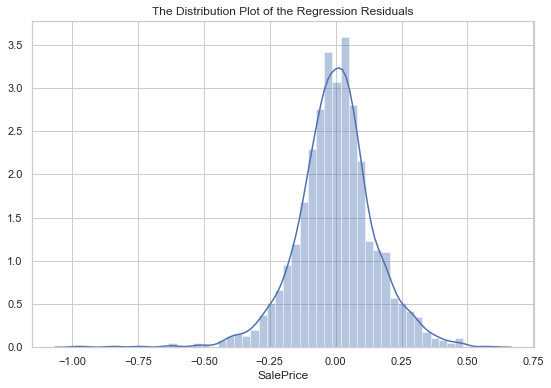

In [43]:
import seaborn as sns
sns.distplot(residual)
plt.title('The Distribution Plot of the Regression Residuals')
print(residual.std())

In [45]:
from scipy.stats import skew
skew(residual)

-0.41408456471836946

0.3994518682611646


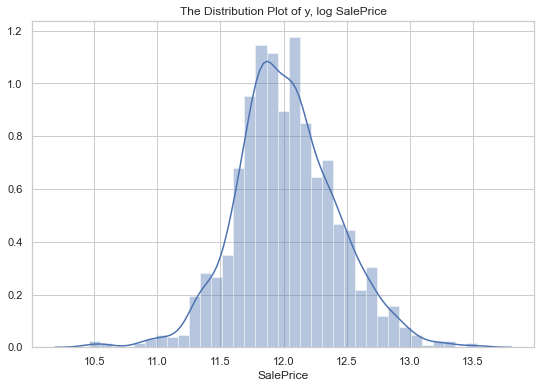

In [49]:
# compare with distribution and skew of y, log SalePrice
import seaborn as sns
sns.distplot(y)
plt.title('The Distribution Plot of y, log SalePrice')
print(y.std())

In [50]:
skew(y)

0.1212103673013655

In [47]:
X2_add=sm.add_constant(X2)
ols = sm.OLS(y, X2_add)
result_red = ols.fit()
result_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     212.2
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:55:23   Log-Likelihood:                 703.24
No. Observations:                1460   AIC:                            -1322.
Df Residuals:                    1418   BIC:                            -1100.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.9398      0.094    106.077      0.000       9.756      10.124
MSSubClass_30           -0.1370      0.021     -6.387      0.000      -0.179      -0.095
MSZoning_FV              0.4188      0.056      7.488      0.000       0.309       0.529
MSZoning_RH              0.4604      0.064      7.229      0.000       0.335       0.585
MSZoning_RL              0.4131      0.052      7.946      0.000       0.311       0.515
MSZoning_RM              0.3475      0.052      6.647      0.000       0.245       0.450
LandContour_HLS          0.0111      0.030      0.372      0.710      -0.047       0.070
LandContour_Low          0.0234      0.034      0.690      0.490      -0.043       0.090
LandContour_Lvl          0.0102      0.020      0.498      0.619      -0.030       0.050
LotConfig_FR2           -0.0662      0.023     -2.874      0.004      -0.111      -0.021
Neighborhood_NridgHt     0.1070      0.021      4.978      0.000       0.065       0.149
Neighborhood_StoneBr     0.1348      0.033      4.137      0.000       0.071       0.199
Neighborhood_Crawfor     0.1867      0.023      7.997      0.000       0.141       0.232
Neighborhood_MeadowV    -0.1797      0.040     -4.441      0.000      -0.259      -0.100
Neighborhood_NoRidge     0.2016      0.026      7.678      0.000       0.150       0.253
Neighborhood_Veenker     0.1025      0.047      2.180      0.029       0.010       0.195
Condition1_Norm          0.0216      0.013      1.679      0.093      -0.004       0.047
Condition1_RRAn          0.0140      0.033      0.430      0.667      -0.050       0.078
HouseStyle_1Story        0.0201      0.010      2.018      0.044       0.001       0.040
Exterior1st_BrkComm     -0.3161      0.108     -2.914      0.004      -0.529      -0.103
MasVnrType_BrkFace      -0.0043      0.010     -0.423      0.672      -0.024       0.015
MasVnrType_Stone         0.0165      0.017      0.974      0.330      -0.017       0.050
Foundation_CBlock        0.0082      0.011      0.775      0.438      -0.013       0.029
Foundation_Stone         0.2023      0.064      3.174      0.002       0.077       0.327
GarageType_Attchd        0.1155      0.042      2.776      0.006       0.034       0.197
GarageType_Basment       0.1240      0.054      2.292      0.022       0.018       0.230
GarageType_BuiltIn       0.1289      0.045      2.852      0.004       0.040       0.218
GarageType_Detchd        0.0882      0.041      2.129      0.033       0.007       0.169
GarageType_NA            0.1320      0.033      3.981      0.000       0.067       0.197
GarageCond_None          0.1320      0.033      3.981      0.000       0.067       0.197
SaleType_ConLD           0.0800      0.052      1.526      0.127      -0.023       0.183
SaleCondition_Normal     0.0177      0.011      1.599    

In [ ]:
# P>|t| not significant: 
# LandContour_HLS, LandContour_Low, LandContour_Lvl, Condition1_Norm, Condition1_RRAn, 
# MasVnrType_BrkFace,  MasVnrType_Stone, Foundation_CBlock, SaleType_ConLD, SaleCondition_Normal

In [51]:
# Repeat Feature Selection again dropping new insignificant columns
X3 = X2.drop(['LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Condition1_Norm', 'Condition1_RRAn', 
'MasVnrType_BrkFace',  'MasVnrType_Stone', 'Foundation_CBlock', 'SaleType_ConLD', 'SaleCondition_Normal'], axis = 1)

In [53]:
lm5 = LinearRegression()
lm5.fit(X3, y)
lm5.score(X3, y)
# R^2 is even lower! 
# 0.8588844905313607 compared to 0.91 for original model

0.8588844905313607

### Conclusion: MLR Model is worse using reduced dataset